# **Our Project**
In this project, I have used the different deep learning-based algorithm, to detect empty inventory in grocery stores.
Usually, when we go to a grocery store, and we see a shelf that doesn’t have the product we need,
then many customers will leave without asking the store workers if they have that item. Even if
the store had that item in their warehouse. This can cause the store to lose out on potential sales
for as long as the inventory remains empty. I have used machine learning models to help stores
replenish inventory quickly so that they don’t lose customers and sales.


### **Installing tensorflow-object-detection-api**

In [ ]:
pip install tensorflow-object-detection-api #installing tensorflow-object-detection-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 13.6 MB/s 
     |████████████████████████████████| 120 kB 64.0 MB/s 
     |████████████████████████████████| 1.6 MB 54.3 MB/s 
     |████████████████████████████████| 82 kB 829 kB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 237 kB 57.0 MB/s 
     |████████████████████████████████| 48 kB 4.9 MB/s 
     |████████████████████████████████| 4.0 MB 41.8 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=45d836d6b3e20b2477b92f13f2dafcfe234bfed645172df8cdbe41229e432a13
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api


### **DataSet Overview**
**SKU-110K** images were collected from thousands of supermarket stores around the world,
including locations in the United States, Europe, and East Asia. Dozens of paid associates
acquired our images, using their personal cellphone cameras. Images were originally taken at no
less than five mega-pixel resolution but were then JPEG compressed at one megapixel.

The **SKU110K** dataset provides 11,762 images with more than 1.7 million annotated bounding
boxes captured in densely packed scenarios, including 8,233 images for training, 588 images for
validation, and 2,941 images for testing. There are around 1,733,678 instances in total. The
images are collected from thousands of supermarket stores and are of various scales, viewing
angles, lighting conditions, and noise levels. All the images are resized into a resolution of one
megapixel. Most of the instances in the dataset are tightly packed and typically of a certain
orientation

### **Models Methodology Workflow**
We selected a collection of detection models and pre-trained them on the SKU-110K dataset such as the EfficientDet D1 640x640, SSD MobileNet V1 FPN 640x640, and SSDResNet50 V1 FPN from TensorFlow 2 Detection Model Zoo and Detecto Module in Pytorch. These models are useful for initialization when training on our new datasets. By comparing
the performance of these models, we have concluded that SSD-ResNet50 delivers better
performance with respect to real-time detection. We trained our model based upon the SSDResNet50 V1 FPN Architecture. The entire workflow of the SSD-ResNet50 V1 FPN
Architecture is illustrated in Figure 3. SSD with the ResNet50 V1 FPN feature extractor in its
architecture is an object detection model that has been trained on the COCO 2017 dataset. A
Momentum optimizer with a learning rate of 0.04 was used for the region proposal and
classification network, and the learning rate was reduced on the plateau. As shown in Figure
3, the Feature Pyramid Network (FPN) generates the multi-level features as inputs to the SSDResNet50 Architecture. The FPN is an extractor and provides the extracted feature maps layers
to an object detector. When the model localizes any small object, it draws an object boundary ox around it at each location. After training the model, the testing procedure was carried out by
providing the surgical videos as input to the trained model. Afterward, we used Tensorboard
which is a suitable feature of the TensorFlow Object Detection API. It allowed us to
continuously monitor and visualize several different training/evaluation metrics when our
model was being trained. As the final step, we obtained the output video containing the
labeled surgical instruments and the assessment results along with the log file. The generated
log file records the surgical assessment, the bounding box for each laparoscopic instrument, and
the center point of each laparoscopic instrument
# 0. Setup Paths

In [ ]:
import os

In [ ]:
CUSTOM_MODEL_NAME = 'ssd_mobilenet_v1' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [ ]:
CUSTOM_MODEL_NAME2 = 'ssd_resnet101_v1' 
PRETRAINED_MODEL_NAME2 = 'ssd_resnet101_v1_fpn_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL2 = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz'

In [ ]:
CUSTOM_MODEL_NAME3 = 'ssd_mobilenet_v2_fpnlite' 
PRETRAINED_MODEL_NAME3 = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL3 = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'CHECKPOINT_PATH2': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME2), 
    'CHECKPOINT_PATH3': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME3),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'OUTPUT_PATH2': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME2, 'export'), 
    'OUTPUT_PATH3': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME3, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFJS_PATH2':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME2, 'tfjsexport'), 
    'TFJS_PATH3':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME3, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'TFLITE_PATH2':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME2, 'tfliteexport'), 
    'TFLITE_PATH3':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME3, 'tfliteexport'),  
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [ ]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'PIPELINE_CONFIG2':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME2, 'pipeline.config'),
    'PIPELINE_CONFIG3':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME3, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD




*   we will not be creating a training job from scratch, but rather we will reuse one of the pre-trained models provided by TensorFlow. If you would like to train an entirely new model, you can have a look at TensorFlow’s tutorial.

The model we shall be using in our examples is the SSD ResNet50 V1 FPN 640x640 model, since it provides a relatively good trade-off between performance and speed. However, there exist a number of other models you can use, all of which are listed in TensorFlow 2 Detection Model Zoo.


*   **Download Pre-Trained Model**
To begin with, we need to download the latest pre-trained network for the model we wish to use. This can be done by simply clicking on the name of the desired model in the table found in TensorFlow 2 Detection Model Zoo. Clicking on the name of your model should initiate a download for a *.tar.gz file.

Once the *.tar.gz file has been downloaded, open it using a decompression program of your choice (e.g. 7zip, WinZIP, etc.). Next, open the *.tar folder that you see when the compressed folder is opened, and extract its contents inside the folder training_demo/pre-trained-models.



In [ ]:
# https://www.tensorflow.org/install/source_windows

In [ ]:
if os.name=='nt':
    !pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 78241, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 78241 (delta 19), reused 18 (delta 7), pack-reused 78197
Receiving objects: 100% (78241/78241), 593.49 MiB | 26.29 MiB/s, done.
Resolving deltas: 100% (55625/55625), done.


In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 11.0 MB 1.5 MB/s 
     |███████████████████████████████

In [ ]:
!pip list

Package                         Version
------------------------------- ----------------------
absl-py                         1.3.0
aeppl                           0.0.33
aesara                          2.7.9
aiohttp                         3.8.3
aiosignal                       1.2.0
alabaster                       0.7.12
albumentations                  1.2.1
altair                          4.2.0
apache-beam                     2.42.0
appdirs                         1.4.4
arviz                           0.12.1
astor                           0.8.1
astropy                         4.3.1
astunparse                      1.6.3
async-timeout                   4.0.2
asynctest                       0.13.0
atari-py                        0.2.9
atomicwrites                    1.4.1
attrs                           22.1.0
audioread                       3.0.0
autograd                        1.5
avro-python3                    1.10.2
Babel                           2.10.3
backcall                 

Verification script for the installation verification.

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-10-22 13:05:20.594956: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 13:05:21.688679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 13:05:21.688914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 13:05:21.688937: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [ ]:
import object_detection

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL2}
    !mv {PRETRAINED_MODEL_NAME2+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME2+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL2)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME2+'.tar.gz'}

if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL3}
    !mv {PRETRAINED_MODEL_NAME3+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME3+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL3)
    !move {PRETRAINED_MODEL_NAME3+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME3+'.tar.gz'}

--2022-10-22 13:06:11--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.119.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90453990 (86M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v1_fp 100%[===================>]  86.26M  48.3MB/s    in 1.8s    

2022-10-22 13:06:13 (48.3 MB/s) - ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [90453990/90453990]

ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_

# 2. Create Label Map
creating a lapmap.txt file which will help us for labling during testing and training. 

In [ ]:
labels = [{'name':'object', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

Converting the images ato tfrecord (binary formate) by using csv annoations file. # 3. Create TF records

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# OPTIONAL IF RUNNING ON COLAB
!unzip "/content/drive/MyDrive/inventory_images.zip"

Archive:  /content/drive/MyDrive/inventory_images.zip
   creating: inventory_images/
  inflating: __MACOSX/._inventory_images  
  inflating: inventory_images/.DS_Store  
  inflating: __MACOSX/inventory_images/._.DS_Store  
   creating: inventory_images/test/
  inflating: __MACOSX/inventory_images/._test  
  inflating: inventory_images/Untitled.ipynb  
  inflating: __MACOSX/inventory_images/._Untitled.ipynb  
  inflating: inventory_images/train_ant.csv  
  inflating: __MACOSX/inventory_images/._train_ant.csv  
   creating: inventory_images/annotations/
  inflating: __MACOSX/inventory_images/._annotations  
   creating: inventory_images/train/
  inflating: __MACOSX/inventory_images/._train  
   creating: inventory_images/val/
  inflating: __MACOSX/inventory_images/._val  
  inflating: inventory_images/test/test_14.jpg  
  inflating: __MACOSX/inventory_images/test/._test_14.jpg  
  inflating: inventory_images/test/test_28.jpg  
  inflating: __MACOSX/inventory_images/test/._test_28.jpg  
 

In [ ]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/dilshad-geol/TF {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
!python /content/Tensorflow/scripts/generate_tfrecord.py --csv_input=/content/inventory_images/annotations/train_annotations.csv  --output_path=/content/Tensorflow/workspace/annotations/train.record --image_dir=/content/inventory_images/train

2022-10-22 13:07:07.898580: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 13:07:08.636133: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 13:07:08.636262: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 13:07:08.636305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [ ]:
!python /content/Tensorflow/scripts/generate_tfrecord.py --csv_input=/content/inventory_images/annotations/test_annotations.csv  --output_path=/content/Tensorflow/workspace/annotations/test.record --image_dir=/content/inventory_images/test

2022-10-22 13:07:15.947578: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 13:07:16.658679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 13:07:16.658797: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 13:07:16.658819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [ ]:
!pip install pytz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Copy Model Config to Training Folder


*   Now that we have downloaded and extracted our pre-trained model, let’s create a directory for our training job. Under the training_demo/models create a new directory named my_ssd_resnet50_v1_fpn and copy the training_demo/pre-trained-models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config file inside the newly created directory. Our training_demo/models directory should now look like this:



In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME2, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH2'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME2, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH2'])}

if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME3, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH3'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME3, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH3'])}

# Update Config For Transfer Learning
Here are  updateing our config according to our requirement. (Update batch number, place the training and testing tfrecord address, epochs for Model training.)

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config2 = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG2'])
config3 = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG3'])


In [ ]:
print(config)
print(config2)
print(config3)

{'model': ssd {
  num_classes: 90
  image_resizer {
    fixed_shape_resizer {
      height: 640
      width: 640
    }
  }
  feature_extractor {
    type: "ssd_mobilenet_v1_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 3.9999998989515007e-05
        }
      }
      initializer {
        random_normal_initializer {
          mean: 0.0
          stddev: 0.009999999776482582
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_threshold: 0.5
      unmatched_threshold: 0.5
      ignore_thres

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config) 

pipeline_config2 = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG2'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config2)

pipeline_config3 = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG3'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config3)   

In [ ]:
pipeline_config.model.ssd.num_classes = 1
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
pipeline_config2.model.ssd.num_classes = 1
pipeline_config2.train_config.batch_size = 4
pipeline_config2.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME2, 'checkpoint', 'ckpt-0')
pipeline_config2.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config2.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config2.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config2.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config2.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
pipeline_config3.model.ssd.num_classes = 1
pipeline_config3.train_config.batch_size = 4
pipeline_config3.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME3, 'checkpoint', 'ckpt-0')
pipeline_config3.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config3.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config3.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config3.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config3.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)  

config_text2 = text_format.MessageToString(pipeline_config2)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG2'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text2)  

config_text3 = text_format.MessageToString(pipeline_config3)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG3'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text3)   

In [ ]:
print(config_text)
print(config_text2)
print(config_text3)

model {
  ssd {
    num_classes: 1
    image_resizer {
      fixed_shape_resizer {
        height: 640
        width: 640
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v1_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 4e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.01
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.997
          scale: true
          epsilon: 0.001
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched

# Train the model
Before we begin training our model, let’s go and copy the TensorFlow/models/research/object_detection/model_main_tf2.py script and paste it straight into our training_demo folder. We will need this script in order to train our model.

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

command2 = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH2'],files['PIPELINE_CONFIG2'])

command3 = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH3'],files['PIPELINE_CONFIG3'])


In [ ]:
print(command)
print(command2)
print(command3)


python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/ssd_mobilenet_v1 --pipeline_config_path=Tensorflow/workspace/models/ssd_mobilenet_v1/pipeline.config --num_train_steps=5000
python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/ssd_resnet101_v1 --pipeline_config_path=Tensorflow/workspace/models/ssd_resnet101_v1/pipeline.config --num_train_steps=5000
python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/ssd_mobilenet_v2_fpnlite --pipeline_config_path=Tensorflow/workspace/models/ssd_mobilenet_v2_fpnlite/pipeline.config --num_train_steps=5000


In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 25 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,392 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (61.9 MB/s)
(Reading database ... 123942 files and directories currently installed.)
Removing libcudnn8-dev (8.1.1.33-1+cuda11.2) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
dpkg: warning: downgrading libcudnn8 from 8.1.1.33-1+cuda11.2 to

In [ ]:
!{command} #training model ssd_mobilenet_v1

2022-10-22 06:24:32.629870: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 06:24:33.433338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 06:24:33.433508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 06:24:33.433529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [ ]:
!{command2}#training model ssd_restnet_v1

2022-10-22 07:04:17.332253: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 07:04:18.263851: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 07:04:18.264008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 07:04:18.264029: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [ ]:
!{command3} #training model ssd_mobilenet_v2_fpnlite

2022-10-22 08:16:30.498083: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 08:16:32.315047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 08:16:32.315893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 08:16:32.315921: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# Evaluate the Model
Firstly, let’s start with a brief explanation of what the evaluation process does. While the training process runs, it will occasionally create checkpoint files inside the training_demo/training folder, which correspond to snapshots of the model at given steps. When a set of such new checkpoint files is generated, the evaluation process uses these files and evaluates how well the model performs in detecting objects in the test dataset. The results of this evaluation are summarised in the form of some metrics, which can be examined over time.# 7. Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

command2 = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH2'],files['PIPELINE_CONFIG2'], paths['CHECKPOINT_PATH2'])

command3 = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH3'],files['PIPELINE_CONFIG3'], paths['CHECKPOINT_PATH3'])

In [ ]:
print(command)
print(command2)
print(command3)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/ssd_mobilenet_v1 --pipeline_config_path=Tensorflow/workspace/models/ssd_mobilenet_v1/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/ssd_mobilenet_v1
python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/ssd_resnet101_v1 --pipeline_config_path=Tensorflow/workspace/models/ssd_resnet101_v1/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/ssd_resnet101_v1
python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/ssd_mobilenet_v2_fpnlite --pipeline_config_path=Tensorflow/workspace/models/ssd_mobilenet_v2_fpnlite/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/ssd_mobilenet_v2_fpnlite


In [ ]:
!{command} ##evaluating model ssd_mobilenet_v1

2022-10-22 08:52:28.991832: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 08:52:29.899650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 08:52:29.899831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 08:52:29.899855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [ ]:
!{command2}##evaluating model ssd_restnet_v1

2022-10-22 10:30:57.220829: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 10:30:57.992227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 10:30:57.992336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 10:30:57.992356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [ ]:
!{command3}##evaluating model ssd_mobilenet_v2_fpnlite

2022-10-22 11:36:12.626666: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 11:36:13.407648: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 11:36:13.407762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 11:36:13.407782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# Loading Train Model From Checkpoint


*   Here we are loading our checkpoint files for model detections. 



In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Prevent GPU complete consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: 
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

configs2 = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG2'])
detection_model2 = model_builder.build(model_config=configs2['model'], is_training=False)

configs3 = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG3'])
detection_model3 = model_builder.build(model_config=configs3['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH2'], 'ckpt-6')).expect_partial()
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH3'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections


def detect_fn2(image):
    image, shapes = detection_model2.preprocess(image)
    prediction_dict2 = detection_model2.predict(image, shapes)
    detections2 = detection_model2.postprocess(prediction_dict2, shapes)
    return detections2

def detect_fn3(image):
    image, shapes = detection_model3.preprocess(image)
    prediction_dict3 = detection_model3.predict(image, shapes)
    detections3 = detection_model3.postprocess(prediction_dict3, shapes)
    return detections3

## **Freeze Graph**

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:

command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

command2 = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG2'], paths['CHECKPOINT_PATH2'], paths['OUTPUT_PATH2'])


command3 = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG3'], paths['CHECKPOINT_PATH3'], paths['OUTPUT_PATH3'])

In [ ]:

print(command)
print(command2)
print(command3)

In [ ]:
!{command}

In [ ]:
!{command2}

In [ ]:
!{command3}

# Exporting Train Model From Checkpoint to Drive


*   Here we are saving our model for future use.



In [ ]:
!zip -r '/content/drive/MyDrive/All_ssd_mobilenet_v1.zip' '/content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/'
!zip -r '/content/drive/MyDrive/All_ssd_resnet101_v1.zip' '/content/Tensorflow/workspace/models/ssd_resnet101_v1/export/'
!zip -r '/content/drive/MyDrive/All_ssd_mobilenet_v2_fpnlite.zip' '/content/Tensorflow/workspace/models/ssd_mobilenet_v2_fpnlite/export/'

### **Unzipping and Loading TF models**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/models/ssd_mobileNet_v1.zip'
!unzip '/content/drive/MyDrive/models/ssd_mobilenet_v2_fpnlite.zip'
!unzip '/content/drive/MyDrive/models/ssd_resnet101_v1_fpn.zip'

Archive:  /content/drive/MyDrive/models/ssd_mobileNet_v1.zip
   creating: content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/
   creating: content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/saved_model/
  inflating: content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/saved_model/saved_model.pb  
   creating: content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/saved_model/assets/
   creating: content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/saved_model/variables/
  inflating: content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/saved_model/variables/variables.index  
  inflating: content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/saved_model/variables/variables.data-00000-of-00001  
   creating: content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/checkpoint/
  inflating: content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/checkpoint/ckpt-0.index  
  inflating: content/Tensorflow/workspace/models/ssd_mobilenet_v

In [ ]:
# LOAD THE MODEL
#MobileNet MODEL Directory
MOBILENET_V1_PATH_TO_SAVED_MODEL = "/content/content/Tensorflow/workspace/models/ssd_mobilenet_v1/export/saved_model"
#MobileNet MODEL Directory
MOBILENET_V2_FPNLITE_PATH_TO_SAVED_MODEL = "/content/content/Tensorflow/workspace/models/ssd_mobilenet_v2_fpnlite/export/saved_model"
#MobileNet MODEL Directory
RESNET_V2_PATH_TO_SAVED_MODEL = "/content/content/Tensorflow/workspace/models/ssd_resnet101_v1/export/saved_model"

# Detect from an Image


*   Now we are testing our trained model for detecting objects from shelves. 



In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

# Enable GPU dynamic memory allocation
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/inventory_images/test/test_10.jpg'


# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
mobilenet_v1_detect_fn = tf.saved_model.load(MOBILENET_V1_PATH_TO_SAVED_MODEL)
mobilenet_v2_fpnlite_detect_fn = tf.saved_model.load(MOBILENET_V2_FPNLITE_PATH_TO_SAVED_MODEL)
resnet_v2_detect_fn = tf.saved_model.load(RESNET_V2_PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 40.347718238830566 seconds


In [ ]:
# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = "/content/inventory_images/test/test_10.jpg"

## **Qualitative Analysis**
We have investigated the performance of current state-of-the-art object detection algorithms on
the SKU-110k dataset. The idea is to draw an analysis that explains how well object detection
algorithms can perform under harsh conditions. We employed SSD_Mobilenet_V2_Fpnlite, SSD
ResNet101 v1 FPN, SSD_Mobilenet_v1_FPN to benchmark their performance on the SKU-
110K dataset. We have leveraged the capabilities of transfer learning in our experiments. All the
object detection networks are incorporated with a backbone of ResNet50 pre-trained on COCO
dataset. We fine-tuned all the models for 5000 epochs and used Adam as an optimizer. We
resized images to 640 × 640 during the training and testing phases.


In [1]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# detection for mobileNetv1fpn
mobilenet_v1_detections = mobilenet_v1_detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(mobilenet_v1_detections.pop('num_detections'))
mobilenet_v1_detections = {key: value[0, :num_detections].numpy()
               for key, value in mobilenet_v1_detections.items()}
mobilenet_v1_detections['num_detections'] = num_detections

# detection_classes should be ints.
mobilenet_v1_detections['detection_classes'] = mobilenet_v1_detections['detection_classes'].astype(np.int64)

mobilenet_v1_image_with_detections = image.copy()
vis_util.visualize_boxes_and_labels_on_image_array(
            mobilenet_v1_image_with_detections,
            mobilenet_v1_detections['detection_boxes'],
            mobilenet_v1_detections['detection_classes'],
            mobilenet_v1_detections['detection_scores'],
            {'object':1},
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.1,
            agnostic_mode=False)

#detection via resnet_v2 
resnet_v2_detections = resnet_v2_detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(resnet_v2_detections.pop('num_detections'))
resnet_v2_detections = {key: value[0, :num_detections].numpy()
               for key, value in resnet_v2_detections.items()}
resnet_v2_detections['num_detections'] = num_detections

# detection_classes should be ints.
resnet_v2_detections['detection_classes'] = resnet_v2_detections['detection_classes'].astype(np.int64)

resnet_v2_image_with_detections = image.copy()
vis_util.visualize_boxes_and_labels_on_image_array(
            resnet_v2_image_with_detections,
            resnet_v2_detections['detection_boxes'],
            resnet_v2_detections['detection_classes'],
            resnet_v2_detections['detection_scores'],
            {'object':1},
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.1,
            agnostic_mode=False)

#detection via fpnlite
mobilenet_v2_fpnlite_detections = mobilenet_v2_fpnlite_detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(mobilenet_v2_fpnlite_detections.pop('num_detections'))
mobilenet_v2_fpnlite_detections = {key: value[0, :num_detections].numpy()
               for key, value in mobilenet_v2_fpnlite_detections.items()}
mobilenet_v2_fpnlite_detections['num_detections'] = num_detections

# detection_classes should be ints.
mobilenet_v2_fpnlite_detections['detection_classes'] = mobilenet_v2_fpnlite_detections['detection_classes'].astype(np.int64)

mobilenet_v2_fpnlite_image_with_detections = image.copy()
vis_util.visualize_boxes_and_labels_on_image_array(
            mobilenet_v2_fpnlite_image_with_detections,
            mobilenet_v2_fpnlite_detections['detection_boxes'],
            mobilenet_v2_fpnlite_detections['detection_classes'],
            mobilenet_v2_fpnlite_detections['detection_scores'],
            {'object':1},
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.1,
            agnostic_mode=False)

print("MobileNet_v1")
cv2_imshow(cv2.cvtColor(mobilenet_v1_image_with_detections, cv2.COLOR_BGR2RGB))
print("ResNet_v2")
cv2_imshow(cv2.cvtColor(resnet_v2_image_with_detections, cv2.COLOR_BGR2RGB))
print("MobileNet_v2_FPNLite")
cv2_imshow(cv2.cvtColor(mobilenet_v2_fpnlite_image_with_detections, cv2.COLOR_BGR2RGB))

Here we will now get to show the images in a single plot to compare results.

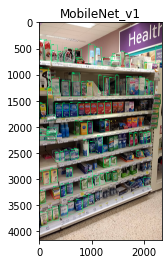

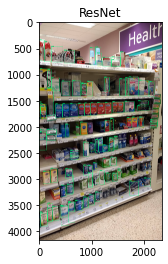

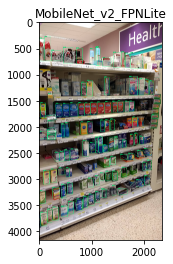

In [ ]:
plt.title("MobileNet_v1")
plt.imshow(cv2.cvtColor(mobilenet_v1_image_with_detections, cv2.COLOR_BGR2RGB))
plt.show()
plt.title("ResNet")
plt.imshow(cv2.cvtColor(resnet_v2_image_with_detections, cv2.COLOR_BGR2RGB))
plt.show()
plt.title("MobileNet_v2_FPNLite")
plt.imshow(cv2.cvtColor(mobilenet_v2_fpnlite_image_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

## **Quantitative Analysis**


In [ ]:
def get_scores_detections(image,detections,detection_threshold):
  scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
  boxes = detections['detection_boxes'][:len(scores)]
  return np.array(scores).mean(),len(boxes)

### **Evaluation Matrix**
The quantitative analysis demonstrates that the proposed approach achieved a minimum loss on
the provided dataset SKU-110k, whereas the qualitative evaluation indicates increase in sales
and customers’ satisfaction level. This section discusses the well-known evaluation criteria
essential to standardize state-of-the-art results for object detection in difficult situations. Finally,
we will present the outcome of our experiments on the SKU-110k dataset. Evaluation Criteria
The standardization of how to assess the performance of approaches on unified datasets is
imperative. Since object detection in a challenging environment is identical to generic object
detection, the approaches appraise similar evaluation metrics.

#### **Precision** 
Precision tells in what ratio the object detection model found the correct objects in the image. Or in other words, how many of the positive results are positive.

#### **Recall** 
Recall tells in what ratio the model managed to identify those cases that are positive.

In [ ]:
#MobileNet_v1
MobileNet_V1_AP, MobileNet_V1_detections = get_scores_detections(mobilenet_v1_image_with_detections,mobilenet_v1_detections,0.5)
print(MobileNet_V1_AP,MobileNet_V1_detections)
#ResNet_v2
ResNet_V2_AP, ResNet_V2_detections = get_scores_detections(resnet_v2_image_with_detections,resnet_v2_detections,0.5)
print(ResNet_V2_AP,ResNet_V2_detections)
#MobileNet_v2_FPNLite
MobileNet_V2_FPNLite_AP, MobileNet_V2_FPNLite_detections = get_scores_detections(mobilenet_v2_fpnlite_image_with_detections,mobilenet_v2_fpnlite_detections,0.5)
print(MobileNet_V2_FPNLite_AP, MobileNet_V2_FPNLite_detections)

0.70863265 34
0.6454833 30
0.65181357 52




### **The losses for the Final Classifier**
**Loss/classification_loss:** Loss for the classification of detected objects into various classes:
object, empty shelves etc.

**Loss/ Localization_loss:** Localization Loss or the Loss of the Bounding Box regressor.

**Loss/ Regularlization_loss:** Regularization refers to the act of modifying a learning algorithm to
favor “simpler” prediction rules to avoid overfitting. Most commonly, regularization refers to
modifying the loss function to penalize certain values of the weights you are learning.

**Loss/ total_loss:** Sum of classification_loss, localization_loss and regularlization_loss and
total_loss.

**Learning Rate:** The learning rate is a tuning parameter in an optimization algorithm that
determines the step size at each iteration while moving toward a minimum of a loss function.




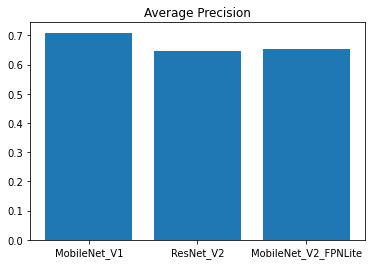

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

data = {"MobileNet_V1":MobileNet_V1_AP,"ResNet_V2":ResNet_V2_AP,"MobileNet_V2_FPNLite":MobileNet_V2_FPNLite_AP}
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.title("Average Precision")
plt.show()

#### **Intersection Over Union**
Intersection Over Union (IOU) is one of the most important evaluation metrics that is regularly
employed to determine the performance of object detection algorithms. It is the measure of how
much the predicted region is overlapping with the actual ground truth region. 
Intersection over Union (IoU) is the name of the calculation which gives “the overlap divided by the union” of 2 bounding boxes: ground truth bounding box and detection (prediction) bounding
box.

For most evaluation cases like competitions, an IoU threshold of 0.5 is sufficient. This number
means that there is most likely an object inside the ground truth box. IoU is used to determine
whether a prediction is positive or negative. For example, if mAP is being calculated for IoU
value of 0.5.

- IoU >= 0.5, then true positive (TP): ground truth object is detected with the correct class.
- IoU < 0.5, then false positive (FP): ground truth object is detected with a wrong class.
- False negative (FN): ground truth object is not detected.

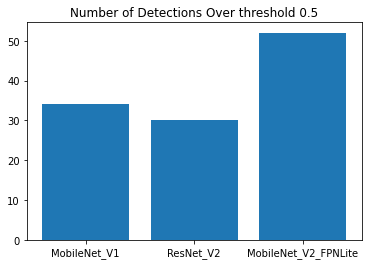

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

data = {"MobileNet_V1":MobileNet_V1_detections,"ResNet_V2":ResNet_V2_detections,"MobileNet_V2_FPNLite":MobileNet_V2_FPNLite_detections}
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.title("Number of Detections Over threshold 0.5")
plt.show()